In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import load_iris

In [3]:
iriss = load_iris()
df_iris = pd.DataFrame(iriss.data, columns=iriss.feature_names)

In [4]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
df_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

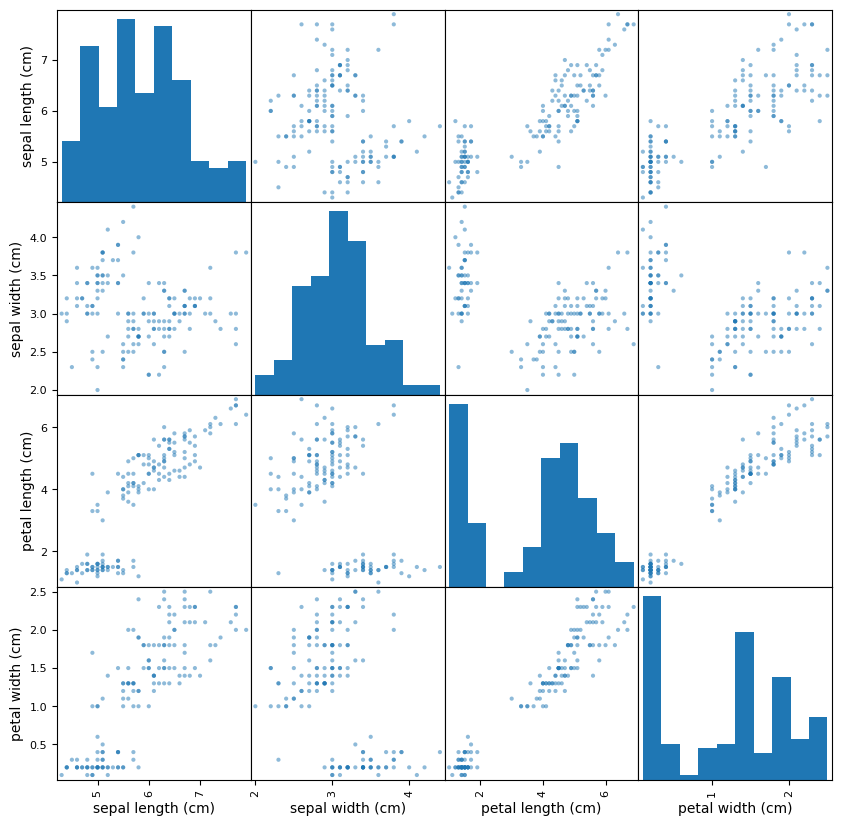

In [7]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df_iris,figsize=(10,10))
plt.show()

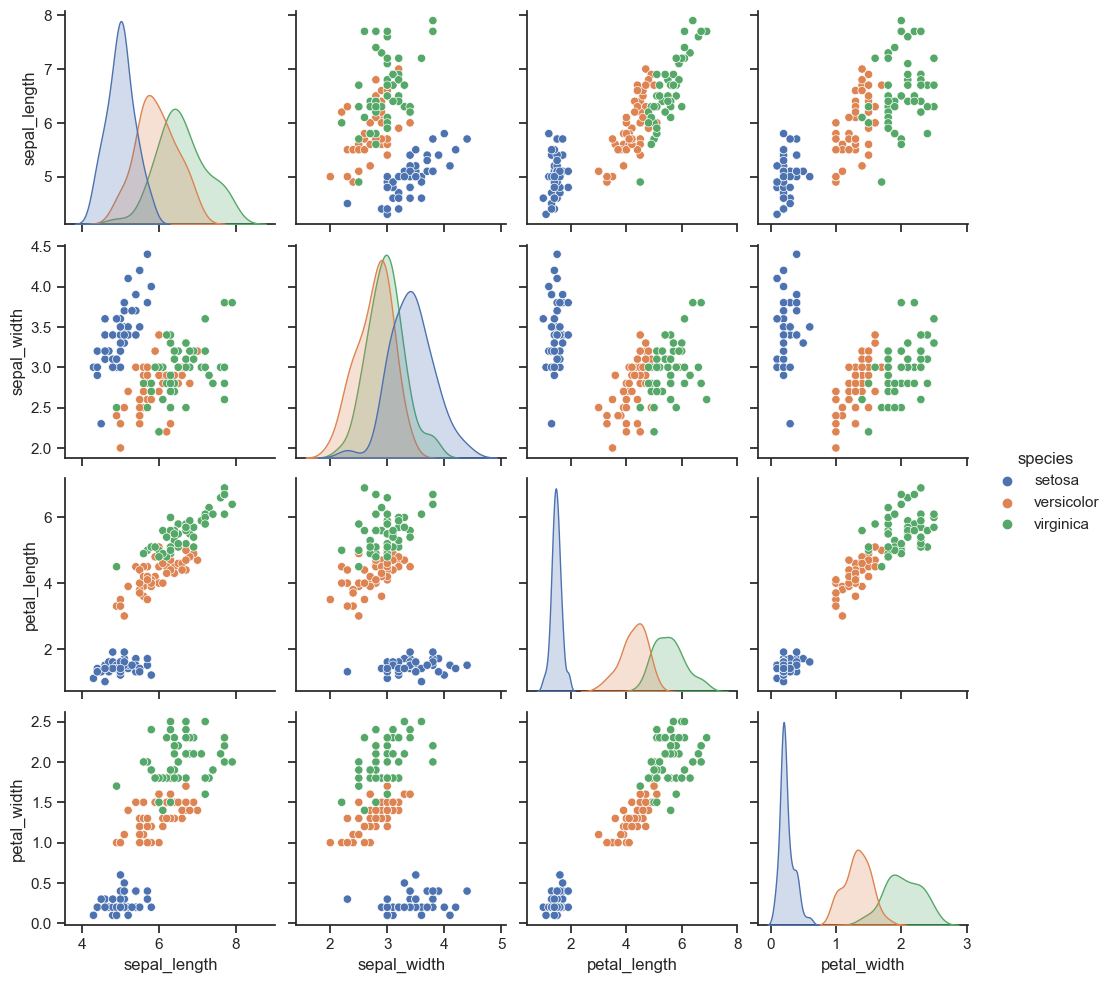

In [8]:
import seaborn as sns 
sns.set(style="ticks",color_codes = True)
dfiris = sns.load_dataset("iris")
sns.pairplot(dfiris, hue="species")

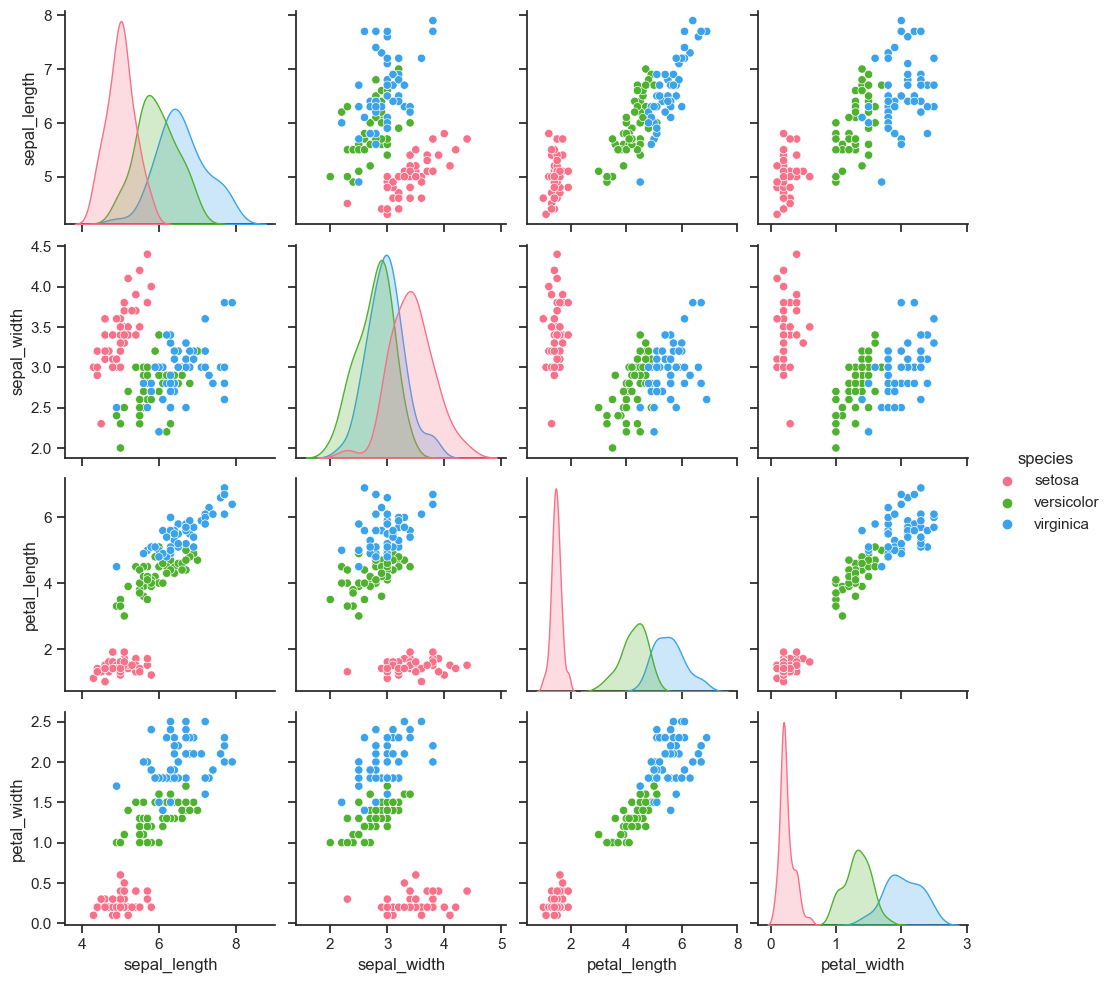

In [9]:
import seaborn as sns 
sns.set(style="ticks", color_codes = True)
dfiris = sns.load_dataset("iris")
sns.pairplot(dfiris,hue = "species" , palette="husl")

In [10]:
labels = np.asarray(dfiris.species)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)

In [29]:
df_selected1 = dfiris.drop(['sepal_length', 'sepal_width', "species"], axis=1)


In [31]:
df_features = df_selected1.to_dict(orient='records')
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
features = vec.fit_transform(df_features).toarray()



In [32]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(
features, labels, test_size=0.20, random_state=0)

In [33]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(features_train, labels_train)
svm_predictions = svm_model_linear.predict(features_test)
accuracy = svm_model_linear.score(features_test, labels_test)
print("Test accuracy:",accuracy)

Test accuracy: 1.0


In [34]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(features_train, labels_train)
svm_predictions = svm_model_linear.predict(features_train)
accuracy = svm_model_linear.score(features_train, labels_train)
print("Train accuracy:",accuracy)

Train accuracy: 0.9583333333333334


In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
features = data[['Purchase Frequency', 'Average Order Value']]

# KMeans clustering
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(features)

# Plot clusters
sns.scatterplot(x='Purchase Frequency', y='Average Order Value', hue='Cluster', data=data)
plt.title('Customer Segmentation')
plt.show()
